In [12]:
from keras.datasets import reuters
import numpy as np

from keras import models
from keras import 

import matplotlib.pyplot as plt

In [13]:
# loading the reuters dataset

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [14]:
# decoding it , back to the text

word_index =reuters.get_word_index()
reverse_word_index =dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire =''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [28]:
# encoding the dataset

def vectorize_sequences(sequences,dimension=10000):
  results =np.zeros((len(sequences),dimension))
  for  i, sequence in enumerate(sequences):
    results[i,sequence] =1

  return results

X_train =vectorize_sequences(train_data)
y_test =vectorize_sequences(test_data)

In [29]:
# encoding the output label

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  =  to_categorical(test_labels)

In [30]:
## Model Defination

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [31]:
# compilation of the model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [32]:
## setting up a validation dataset

x_val =X_train[:1000]
partial_x_train =X_train[1000:]

y_val =one_hot_train_labels[:1000]
partial_y_train =one_hot_train_labels[1000:]

In [33]:
# training the models

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.6133 - accuracy: 0.4489 - val_loss: 1.7797 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.4863 - accuracy: 0.6929 - val_loss: 1.3615 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.1134 - accuracy: 0.7571 - val_loss: 1.1650 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8832 - accuracy: 0.8051 - val_loss: 1.0630 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.7092 - accuracy: 0.8460 - val_loss: 0.9961 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5745 - accuracy: 0.8761 - val_loss: 0.9564 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4650 - accuracy: 0.9007 - val_loss: 0.9071 - val_accuracy: 0.8100
Epoch 8/20
16

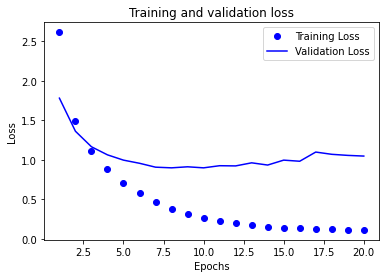

In [35]:
# training and validation loss

loss =history.history['loss']
val_loss =history.history['val_loss']

epochs =range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

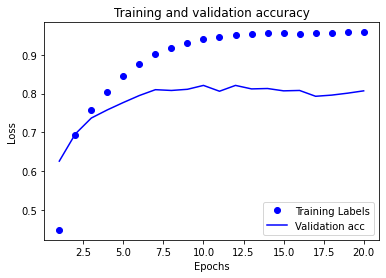

In [39]:
# training and validation accuracy

plt.clf()
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training Labels')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
# Retraining a model from scratch ( to prevent the overfit)

model =models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(y_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 2.6104 - accuracy: 0.4822 - val_loss: 1.7579 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 1s 37ms/step - loss: 1.4181 - accuracy: 0.7037 - val_loss: 1.3031 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.0404 - accuracy: 0.7755 - val_loss: 1.1298 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 0.8174 - accuracy: 0.8222 - val_loss: 1.0302 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 38ms/step - loss: 0.6601 - accuracy: 0.8596 - val_loss: 0.9640 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 37ms/step - loss: 0.5252 - accuracy: 0.8911 - val_loss: 0.9377 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.4267 - accuracy: 0.9110 - val_loss: 0.9068 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [44]:
results

[0.9811450839042664, 0.7831701040267944]

In [45]:
# A model with Information bottleneck

model =models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
250/250 [==============================] - 2s 9ms/step - loss: 2.3484 - accuracy: 0.4097 - val_loss: 1.6977 - val_accuracy: 0.5600
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 1.4395 - accuracy: 0.6389 - val_loss: 1.4317 - val_accuracy: 0.6390
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 1.2240 - accuracy: 0.6774 - val_loss: 1.3799 - val_accuracy: 0.6760
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 1.0876 - accuracy: 0.7075 - val_loss: 1.3744 - val_accuracy: 0.7010
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.9652 - accuracy: 0.7593 - val_loss: 1.4076 - val_accuracy: 0.7210
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.8623 - accuracy: 0.7969 - val_loss: 1.4040 - val_accuracy: 0.7150
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.7790 - accuracy: 0.8150 - val_loss: 1.4841 - val_accuracy: 0.7210
Epoch 

**Further Experiments**


In [46]:
## increase the middle hidden layer size from 4 to 32

model =models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
250/250 [==============================] - 2s 9ms/step - loss: 1.5460 - accuracy: 0.6735 - val_loss: 1.0880 - val_accuracy: 0.7580
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.8135 - accuracy: 0.8259 - val_loss: 0.9098 - val_accuracy: 0.8180
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 0.5266 - accuracy: 0.8895 - val_loss: 0.8879 - val_accuracy: 0.8230
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3704 - accuracy: 0.9208 - val_loss: 0.9280 - val_accuracy: 0.8140
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2818 - accuracy: 0.9386 - val_loss: 1.0118 - val_accuracy: 0.8180
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2361 - accuracy: 0.9465 - val_loss: 1.0916 - val_accuracy: 0.8040
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2048 - accuracy: 0.9510 - val_loss: 1.1874 - val_accuracy: 0.8050
Epoch 

In [47]:
## increase the middle hidden layer size from 32 to 128

model =models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
250/250 [==============================] - 2s 10ms/step - loss: 1.4144 - accuracy: 0.6889 - val_loss: 1.0481 - val_accuracy: 0.7680
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.7241 - accuracy: 0.8391 - val_loss: 0.8964 - val_accuracy: 0.8120
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 0.4429 - accuracy: 0.9050 - val_loss: 0.8630 - val_accuracy: 0.8310
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3056 - accuracy: 0.9313 - val_loss: 0.9185 - val_accuracy: 0.8300
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2422 - accuracy: 0.9434 - val_loss: 1.0259 - val_accuracy: 0.8170
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2036 - accuracy: 0.9496 - val_loss: 1.1483 - val_accuracy: 0.8140
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.1878 - accuracy: 0.9530 - val_loss: 1.2280 - val_accuracy: 0.8060
Epoch

In [49]:
model =models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
250/250 [==============================] - 2s 9ms/step - loss: 1.4688 - accuracy: 0.6734 - val_loss: 1.1072 - val_accuracy: 0.7510
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.7971 - accuracy: 0.8197 - val_loss: 0.9253 - val_accuracy: 0.7990
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 0.4950 - accuracy: 0.8894 - val_loss: 0.9513 - val_accuracy: 0.8240
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3377 - accuracy: 0.9226 - val_loss: 1.0415 - val_accuracy: 0.8180
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2593 - accuracy: 0.9389 - val_loss: 1.0771 - val_accuracy: 0.8080
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2207 - accuracy: 0.9449 - val_loss: 1.0476 - val_accuracy: 0.8120
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.1904 - accuracy: 0.9524 - val_loss: 1.3658 - val_accuracy: 0.7830
Epoch 